In [1]:
# Imports
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../") 

import matplotlib.pyplot as plt
import jax.numpy as jnp
import numpyro
import pandas as pd

numpyro.set_host_device_count(4)

from epimodel import run_model, default_model, arma_model, latent_nn_model, EpidemiologicalParameters, preprocess_data
from epimodel.models.model_predict_utils import *
from epimodel.models.model_build_utils import *

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
Importing plotly failed. Interactive plots will not work.


In [2]:
# dates for data processing
start_date="2020-08-01"
end_date="2021-01-02"

# Gets data
data = preprocess_data('../data/all_merged_data_2021-01-22.csv', start_date=start_date, end_date=end_date)
all_data = preprocess_data('../data/all_merged_data_2021-01-22.csv')
# data = preprocess_data('../data/small_dataset.csv', start_date=start_date, end_date=end_date)
# all_data = preprocess_data('../data/small_dataset.csv')

data.featurize()
all_data.featurize()

ep = EpidemiologicalParameters()


Processing data from 2020-08-01 00:00:00 to 2021-01-02 00:00:00
Processing data from 2020-08-01 00:00:00 to 2021-01-22 00:00:00
Note: under drop_outdoor gathering aggregation, the gatherings_aggregation_type is disregarded
Note: under drop_outdoor gathering aggregation, the gatherings_aggregation_type is disregarded


In [5]:
df = pd.read_csv('interactions3.csv')
pairs = df.loc[:,'Interacting Pair']

col1 = pairs.map(lambda x: data.CMs[int(x[1:-1].split(',')[0])])
col2 = pairs.map(lambda x: data.CMs[int(x[1:-1].split(',')[1])])

df.insert(1, 'First CM', col1)
df.insert(2, 'Second CM', col2)

df.to_csv('interactions3.csv', index=False)

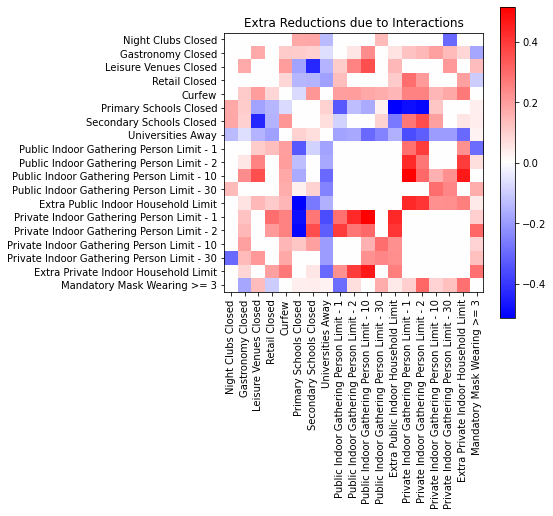

In [5]:
heatmap = np.zeros((19,19))
df = pd.read_csv('interactions4.csv')

for i in df.index:
    row = df.loc[i]
    if np.abs(row['Mean Reduction'])> 2*row['Standard Deviation']:
        pair = list(map(int,row['Interacting Pair'][1:-1].split(',')))
        if pair[1] < pair[0]:
            continue
        else:
            heatmap[pair[0], pair[1]] = row['Mean Reduction']

heatmap = heatmap + heatmap.T

plt.figure(figsize=(9, 9))

plt.imshow(heatmap, cmap='bwr', interpolation='nearest')
plt.title('Extra Reductions due to Interactions')
data.CMs[0]='Night Clubs Closed'
plt.xticks(np.arange(0,19), data.CMs)
plt.xticks(rotation = 90)
plt.yticks(np.arange(0,19), data.CMs)
plt.colorbar()

plt.gcf().subplots_adjust(bottom=0.4)
plt.gcf().subplots_adjust(left=0.4)
# plt.show()
plt.savefig('Graphs/Interactions/heatmap4')

